In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Load the CSV File from the repo
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
#Prints  basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
#Count the number of null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
#Transforms the categorical values into binary values using LabelEncoder from Sklearn
# sex and smoker are binary, and region is on a range from 0 - 4
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df.sex = encoder.fit_transform(df.sex)

df.smoker = encoder.fit_transform(df.smoker)

region = pd.get_dummies(df['region'])
#     df = df.drop('region', axis=1)

df = pd.concat([df, region], axis=1)
df= df.loc[:,~df.columns.duplicated()]
df.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,0,1,0,0


## Exploratory Data Analysis

In [5]:
print('The shape of the data is: ' + str(df.shape))

The shape of the data is: (1338, 11)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int32  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int32  
 5   region     1338 non-null   object 
 6   charges    1338 non-null   float64
 7   northeast  1338 non-null   uint8  
 8   northwest  1338 non-null   uint8  
 9   southeast  1338 non-null   uint8  
 10  southwest  1338 non-null   uint8  
dtypes: float64(2), int32(2), int64(2), object(1), uint8(4)
memory usage: 68.1+ KB


In [7]:
df.describe()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


In [8]:
df.median(numeric_only=True)

age            39.000
sex             1.000
bmi            30.400
children        1.000
smoker          0.000
charges      9382.033
northeast       0.000
northwest       0.000
southeast       0.000
southwest       0.000
dtype: float64

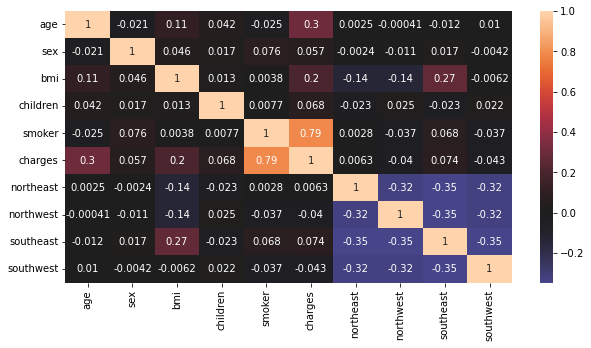

In [9]:
corr_data = df.corr()
fig = plt.figure(figsize = [10,5])
sns.heatmap(corr_data,annot = True, center = 0)
plt.show()

<AxesSubplot:xlabel='age', ylabel='charges'>

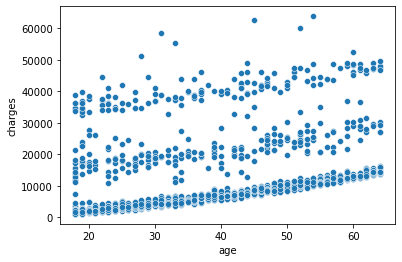

In [10]:
sns.scatterplot(x='age', y='charges', data=df)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

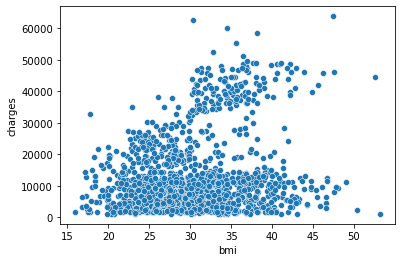

In [11]:
sns.scatterplot(x='bmi', y='charges', data=df)

<AxesSubplot:xlabel='children', ylabel='charges'>

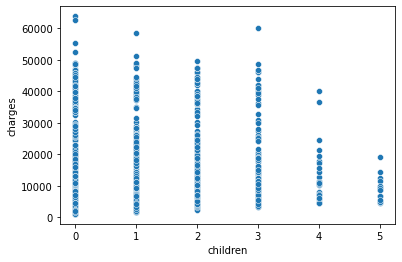

In [12]:
sns.scatterplot(x='children', y='charges', data=df)

<AxesSubplot:xlabel='charges', ylabel='Count'>

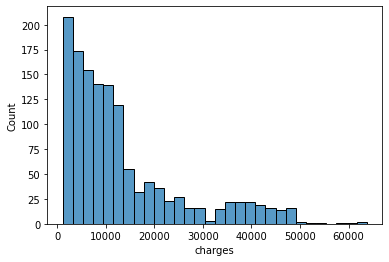

In [13]:
sns.histplot(x='charges', data=df)

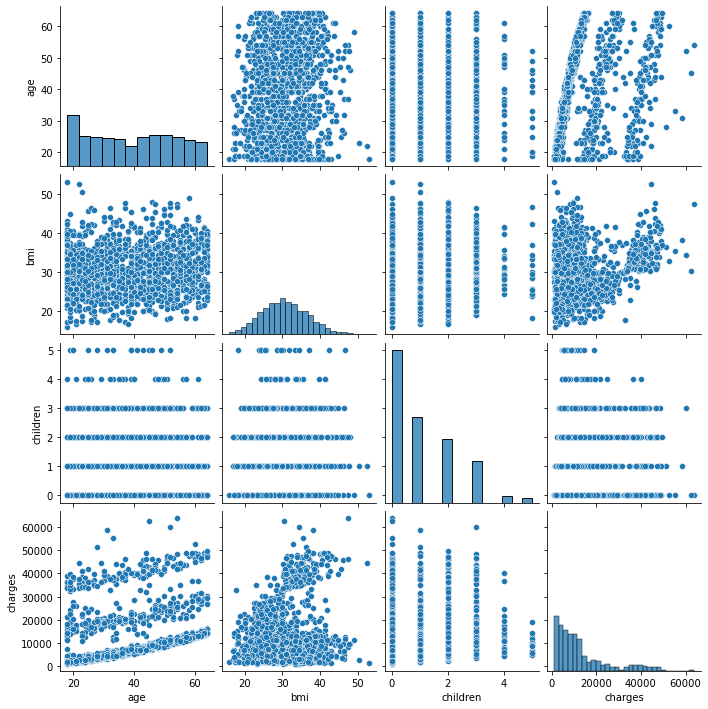

In [14]:
sns.pairplot(df, vars=["age", 'bmi','children','charges'])
plt.show()

Text(0.5, 1.0, 'Age Distribution')

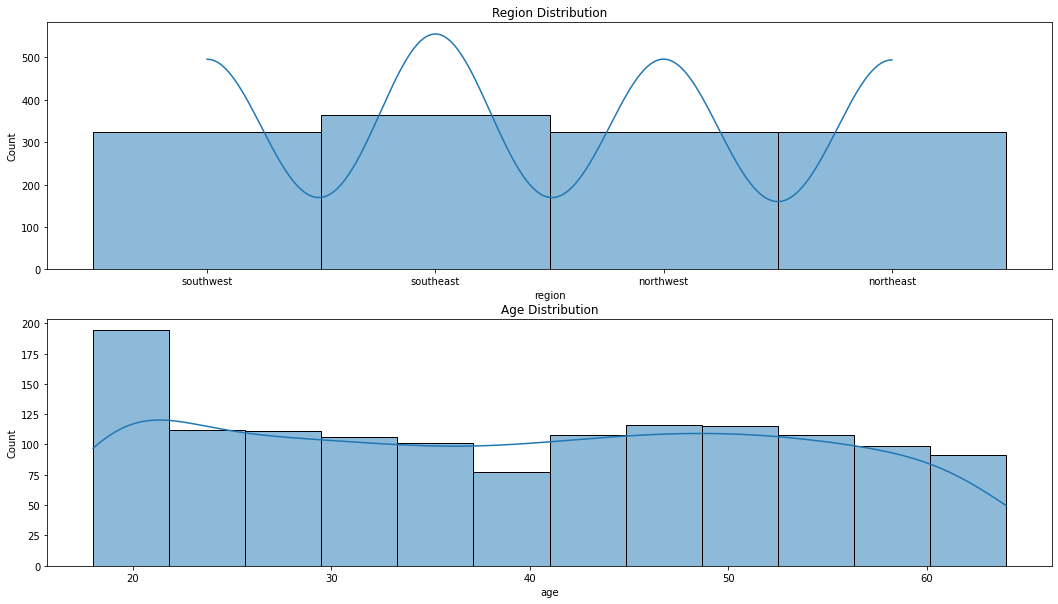

In [15]:
fig, axes = plt.subplots(2,1, figsize=(18, 10))
sns.histplot(df['region'], kde=True, ax=axes[0]) 
axes[0].set_title('Region Distribution')
sns.histplot(df['age'], kde=True, ax=axes[1]) 
axes[1].set_title('Age Distribution')

Text(0.5, 1.0, 'Sex vs Charges')

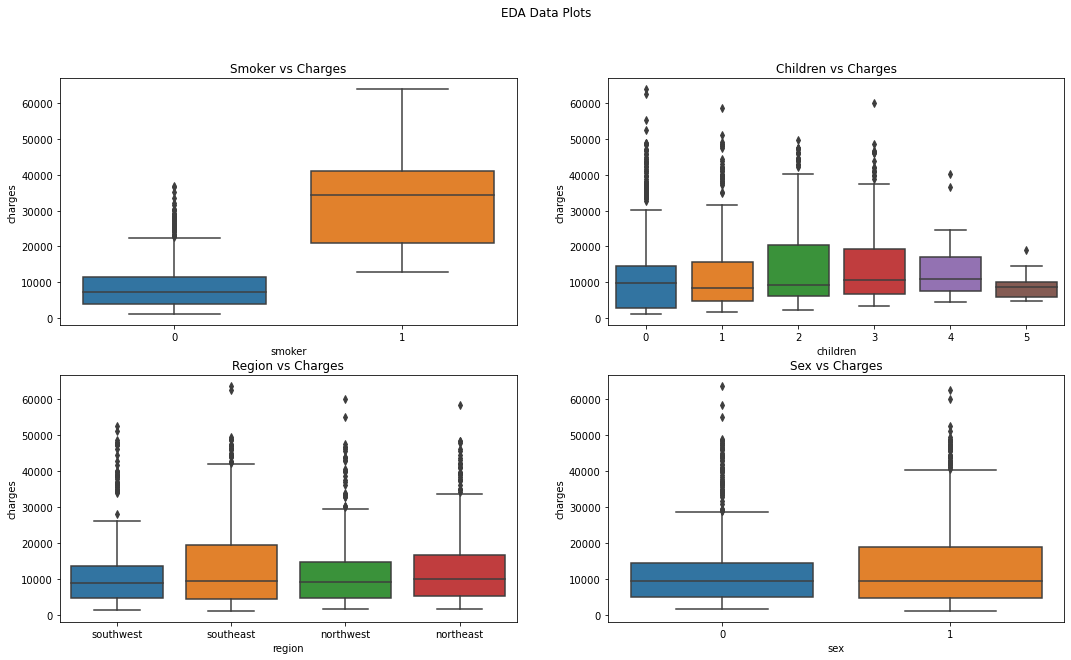

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('EDA Data Plots')

sns.boxplot(ax=axes[0, 0], data=df, x='smoker', y='charges')
axes[0,0].set_title('Smoker vs Charges')
sns.boxplot(ax=axes[0, 1], data=df, x='children', y='charges')
axes[0,1].set_title('Children vs Charges')
sns.boxplot(ax=axes[1, 0], data=df, x='region', y='charges')
axes[1,0].set_title('Region vs Charges')
sns.boxplot(ax=axes[1, 1], data=df, x='sex', y='charges')
axes[1,1].set_title('Sex vs Charges')

Text(0.5, 1.0, 'Smoker vs Charges')

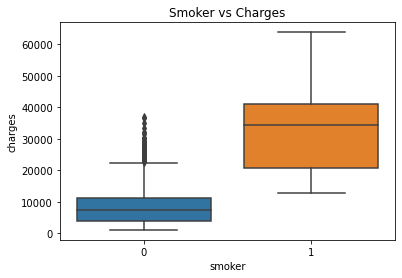

In [17]:
sns.boxplot(x = 'smoker', y = 'charges', data = df)
plt.title('Smoker vs Charges')

In [18]:
x = df.drop(['charges', 'region'], axis=1)
y = df['charges']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, train_size = 0.7, random_state = 1)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

results = {}

basic_lin_reg = LinearRegression()
basic_lin_reg.fit(X_train, y_train)
rSqrted = basic_lin_reg.score(X_test, y_test)
print(basic_lin_reg.intercept_)
print(basic_lin_reg.coef_)
print(rSqrted)
adj_rSqrted = 1 - (1-rSqrted)*(len(y)-1)/(len(y)-X_train.shape[1]-1)
print(adj_rSqrted)
results['basic_lin_reg'] = [rSqrted, adj_rSqrted]


13276.698553898505
[3528.98273114 -141.35911014 1961.65520818  421.55016415 9733.78688309
  230.14079939   99.89180015 -176.86423097 -143.927575  ]
0.7405989316927211
0.738840942524976


In [25]:
#Linear Regression Model on Smoker, BMI and Age

x_corr = df.drop(['charges', 'region', 'southeast', 'southwest','northeast', 'children', 'northwest'], axis=1)
y_corr = df['charges']
X_corr_train, X_corr_test, y_corr_train, y_corr_test = train_test_split(x_corr,y_corr, test_size = 0.3, train_size = 0.7, random_state = 1)
X_corr_train.head()
results = {}

scaler = StandardScaler()
X_corr_train = scaler.fit_transform(X_corr_train)
X_corr_test = scaler.transform(X_corr_test)

basic_corr_lin_reg = LinearRegression()
basic_corr_lin_reg.fit(X_corr_train, y_corr_train)
rSqrted_corr = basic_corr_lin_reg.score(X_corr_test, y_corr_test)
print(basic_corr_lin_reg.intercept_)
print(basic_corr_lin_reg.coef_)
print(rSqrted_corr)
adj_rSqrted_corr = 1 - (1-rSqrted_corr)*(len(y)-1)/(len(y)-X_corr_train.shape[1]-1)
print(adj_rSqrted_corr)
results['basic_corr_lin_reg'] = [rSqrted_corr, adj_rSqrted_corr]

13276.698553898505
[3545.64880072 -125.96549644 1863.5444008  9726.81785855]
0.7346651621337207
0.7338689585692307


In [26]:
from sklearn.linear_model import Ridge
basic_ridge_reg = Ridge()
basic_ridge_reg.fit(X_train, y_train)
rSqrted = basic_ridge_reg.score(X_test, y_test)
print(basic_ridge_reg.intercept_)
print(basic_ridge_reg.coef_)
print(rSqrted)
adj_rSqrted = 1 - (1-rSqrted)*(len(y)-1)/(len(y)-X_train.shape[1]-1)
print(adj_rSqrted)
results['basic_ridge_reg'] = [rSqrted, adj_rSqrted]

13276.698553898505
[3525.36268866 -140.42856602 1959.75453317  421.10911164 9723.27965954
  229.78840589   99.43309692 -176.09780566 -143.90979165]
0.7406122602486029
0.7388543614099263


In [27]:
from sklearn.linear_model import Lasso
import math

basic_lasso_reg = Lasso(alpha=0.2)
basic_lasso_reg.fit(X_train, y_train)
rSqrted = basic_lasso_reg.score(X_test, y_test)
print(basic_lasso_reg.intercept_)
print(basic_lasso_reg.coef_)
print(rSqrted)
adj_rSqrted = 1 - (1-rSqrted)*(len(y)-1)/(len(y)-X_train.shape[1]-1)
print(adj_rSqrted)
results['basic_lasso_reg'] = [rSqrted, adj_rSqrted]


pred = basic_lasso_reg.predict(X_test)
print("Lasso MSE is: ", mean_squared_error(y_test, pred))
print("Sqrt MSE is: ",  math.sqrt(mean_squared_error(y_test, pred)))

13276.698553898505
[3528.8256897  -141.1238797  1961.36591023  421.35036236 9733.56441875
  344.15638826  213.58458479  -58.71075601  -27.06356053]
0.7405967362169912
0.738838732170269
Lasso MSE is:  36761767.48752917
Sqrt MSE is:  6063.148314822026


In [29]:
from sklearn.model_selection import GridSearchCV

grid_params_lasso =  {  'alpha': np.arange(0.01, 1, 0.005)}

grid_lasso = Lasso()

grid_lasso = GridSearchCV(estimator = grid_lasso, param_grid = grid_params_lasso, cv = 3, n_jobs = -1, verbose = 2)
grid_lasso.fit(X_train, y_train)

print("The best params are: ", grid_lasso.best_params_)

grid_lasso = grid_lasso.best_estimator_

Fitting 3 folds for each of 198 candidates, totalling 594 fits
The best params are:  {'alpha': 0.9899999999999999}


In [30]:
rSqrted = grid_lasso.score(X_test, y_test)
print(grid_lasso.intercept_)
print(grid_lasso.coef_)
print(rSqrted)
adj_rSqrted = 1 - (1-rSqrted)*(len(y)-1)/(len(y)-X_train.shape[1]-1)
print(adj_rSqrted)
results['best_lasso_reg'] = [rSqrted, adj_rSqrted]


pred = grid_lasso.predict(X_test)
print("Best Lasso MSE is: ", mean_squared_error(y_test, pred))
print("Sqrt MSE is: ",  math.sqrt(mean_squared_error(y_test, pred)))


13276.698553898505
[3528.1737312  -140.20773761 1960.21236941  420.56450465 9732.68404284
  343.02026788  212.56124165  -58.28436052  -26.80627887]
0.7405878072434622
0.7388297426841182
Best Lasso MSE is:  36763032.8719503
Sqrt MSE is:  6063.252664366734


Decision tree accuracy:  0.7304699359774234


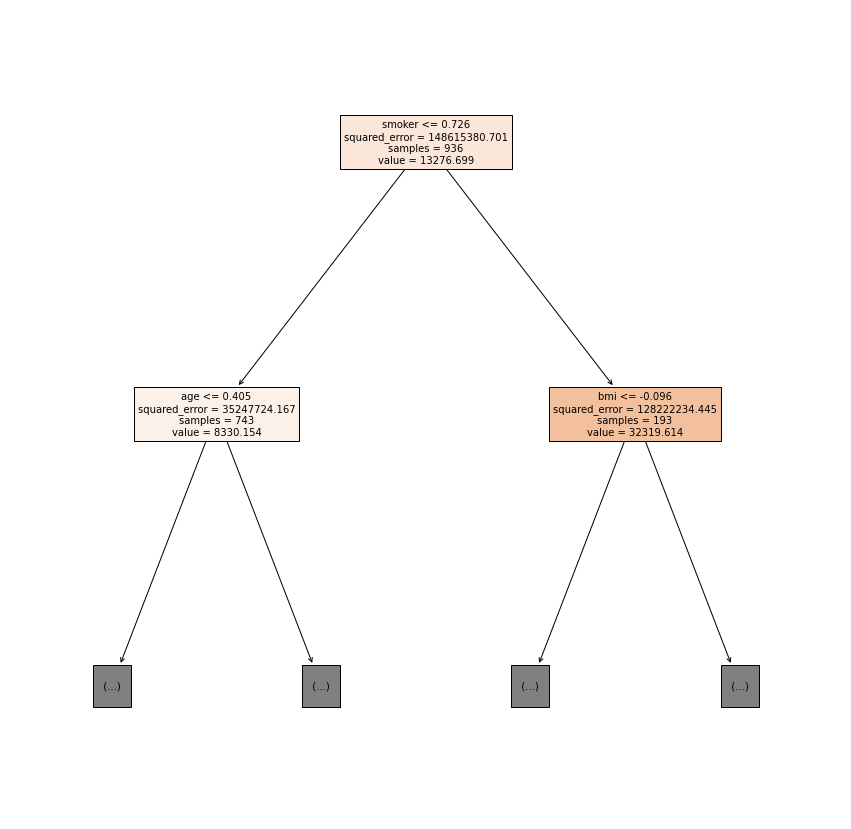

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

basic_decision_tree = DecisionTreeRegressor()
basic_decision_tree.fit(X_train, y_train)

score = basic_decision_tree.score(X_test, y_test)
print('Decision tree accuracy: ', score)

plt.figure(figsize=(15,15))
tree.plot_tree(basic_decision_tree, max_depth=1, fontsize=10, feature_names=df.columns, filled=True)
plt.show()

In [32]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

score = random_forest.score(X_test, y_test)
print('Random Forest tree accuracy: ', score)

Random Forest tree accuracy:  0.8335238223020027


In [33]:
param_grid = {
    'max_depth': [100, 120, 140, 160, 180, 200],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [5, 6, 7, 8],
    'n_estimators': [50, 100, 120 ,150, 200, 300, 1000]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
grid_search.best_params_
print("The best params are: ", grid_search.best_params_)

grid_random_forest = grid_search.best_estimator_

Fitting 3 folds for each of 1680 candidates, totalling 5040 fits
The best params are:  {'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


In [34]:
score = grid_random_forest.score(X_test, y_test)
print('Random Forest tree accuracy: ', score)

adj_rSqrted = 1 - (1-score)*(len(y)-1)/(len(y)-X_train.shape[1]-1)
print(adj_rSqrted)

pred = grid_random_forest.predict(X_test)
print("Sqrt MSE is: ",  math.sqrt(mean_squared_error(y_test, pred)))

results['best_random_forest'] = [score, adj_rSqrted]


Random Forest tree accuracy:  0.8400220763803465
0.8389378886449723
Sqrt MSE is:  4761.463963508273


In [35]:
from sklearn.preprocessing import PolynomialFeatures

poly_obj = PolynomialFeatures(degree=2)
poly_x = poly_obj.fit_transform(x)
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(poly_x,y, test_size = 0.3, train_size = 0.7, random_state = 1)
basic_poly_reg = LinearRegression()
basic_poly_reg.fit(X_poly_train, y_poly_train)

rSqrted = basic_poly_reg.score(X_poly_test, y_poly_test)
print(basic_poly_reg.intercept_)
print(basic_poly_reg.coef_)
print(rSqrted)
adj_rSqrted = 1 - (1-rSqrted)*(len(y)-1)/(len(y)-X_train.shape[1]-1)
print(adj_rSqrted)

results['basic_poly_reg'] = [rSqrted, adj_rSqrted]

poly_pred = basic_poly_reg.predict(X_poly_test)
print("Poly MSE is: ", mean_squared_error(y_poly_test, poly_pred))
print("Sqrt MSE is: ",  math.sqrt(mean_squared_error(y_poly_test, poly_pred)))

-6449519344277.836
[ 6.44951934e+12 -7.14016997e+01 -7.80504592e+02  2.68074401e+02
  1.05283802e+03 -8.42625842e+03 -1.19673858e+02 -1.87488785e+02
  7.31959165e+02 -4.24796521e+02  3.72319161e+00  2.40387289e+01
  1.10225408e+00  5.59136576e+00 -7.07837118e+00 -4.42158606e+01
 -4.71217726e+01  1.58415090e+01  4.09442444e+00 -7.80504592e+02
  1.19891774e+01 -1.27373267e+02 -6.41266925e+02 -2.56154850e+02
 -6.38609247e+02  3.87030471e+02 -2.72770966e+02 -5.53442254e+00
 -1.53342847e+01  1.44548540e+03  1.32437948e+02  1.16394126e+02
 -3.21598642e+01  5.14021908e+01 -9.02340135e+01 -7.86240177e+02
  1.53914528e+02  6.57611599e+02  1.44659785e+02  9.66521034e+01
 -8.42625842e+03 -1.85395639e+03 -2.56888497e+03 -2.59896383e+03
 -1.40445324e+03 -1.19673858e+02  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.87488785e+02  0.00000000e+00  0.00000000e+00
  7.31959165e+02  0.00000000e+00 -4.24796521e+02]
0.8456199804922517
0.8445737303600456
Poly MSE is:  21878222.729731895
Sqrt MSE is:  4

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Predicted Charges')]

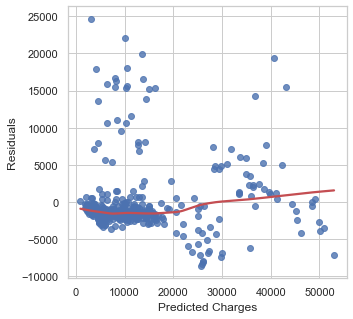

In [36]:
residual = (y_test - poly_pred)
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize =(5,5))
sns.regplot(x=poly_pred,y=residual,ax=ax, lowess=True, line_kws=dict(color="r"))
ax.set(ylabel='Residuals',xlabel='Predicted Charges')


In [37]:
from prettytable import PrettyTable

table = PrettyTable()

table.field_names = ['Model', 'R^2', 'Adj. R^2']
for key in results:
    if 'nn_model' not in key: table.add_row([key, str(format(results[key][0],'.5f')), str(format(results[key][1],'.5f'))])

print(table)

+--------------------+---------+----------+
|       Model        |   R^2   | Adj. R^2 |
+--------------------+---------+----------+
| basic_corr_lin_reg | 0.73467 | 0.73387  |
|  basic_ridge_reg   | 0.74061 | 0.73885  |
|  basic_lasso_reg   | 0.74060 | 0.73884  |
|   best_lasso_reg   | 0.74059 | 0.73883  |
| best_random_forest | 0.84002 | 0.83894  |
|   basic_poly_reg   | 0.84562 | 0.84457  |
+--------------------+---------+----------+


In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


def generateNeuralNetwork():
    tf.random.set_seed(1)
    model = keras.Sequential([
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mse'])
    return model

In [39]:
base_model = generateNeuralNetwork()
history = base_model.fit(x=X_train, y=y_train, batch_size = 128, epochs=150, verbose=0)
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 43,777
Trainable params: 43,777
Non-trainable params: 0
_________________________________________________________________


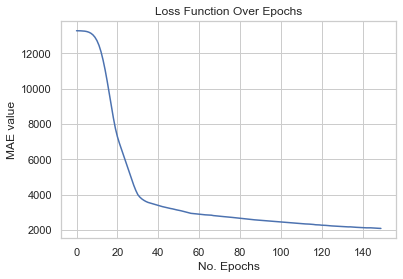

In [40]:
plt.plot(history.history['loss'])
plt.title('Loss Function Over Epochs')
plt.ylabel('MAE value')
plt.xlabel('No. Epochs')
plt.show()

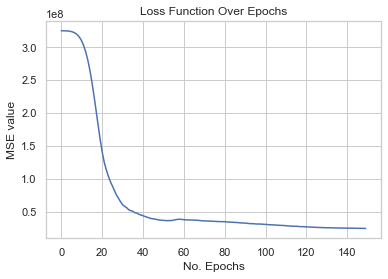

In [41]:
plt.plot(history.history['mse'])
plt.title('Loss Function Over Epochs')
plt.ylabel('MSE value')
plt.xlabel('No. Epochs')
plt.show()

In [42]:
results['basic_nn_model'] = base_model.evaluate(X_test, y_test, verbose=0)
print(results)

{'basic_corr_lin_reg': [0.7346651621337207, 0.7338689585692307], 'basic_ridge_reg': [0.7406122602486029, 0.7388543614099263], 'basic_lasso_reg': [0.7405967362169912, 0.738838732170269], 'best_lasso_reg': [0.7405878072434622, 0.7388297426841182], 'best_random_forest': [0.8400220763803465, 0.8389378886449723], 'basic_poly_reg': [0.8456199804922517, 0.8445737303600456], 'basic_nn_model': [1990.7427978515625, 23402208.0]}


In [43]:
nn_results = {}
for key in results:
    if("nn_model" in key): nn_results[key] = results[key]

pd.DataFrame(nn_results, index=['MAE Loss', 'MSE']).T

,MAE Loss,MSE
basic_nn_model,1990.742798,23402208.0


In [64]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

model = KerasRegressor(build_fn = generateNeuralNetwork)
params = {
    'batch_size': [8, 16, 32, 64, 128, 150],
    'epochs': [50, 100, 150]
}
grid = GridSearchCV(estimator= model, param_grid= params, cv=3)

grid = grid.fit(X_train, y_train, verbose = 0)

C:\Users\mjzeo\AppData\Local\Temp/ipykernel_2412/1384119743.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = generateNeuralNetwork)


3/3 [==============================] - 0s 4ms/step - loss: 2628.2048 - mse: 31490126.0000


In [67]:
best_parameters = grid.best_params_

print("Best Parameters: " + str(grid.best_params_))

Best Parameters: {'batch_size': 16, 'epochs': 150}


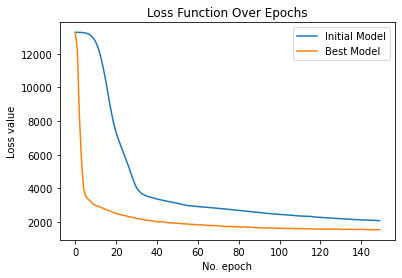

In [68]:
grid_search_nn = generateNeuralNetwork()
nn_history = grid_search_nn.fit(x = X_train, y = y_train, batch_size = best_parameters['batch_size'], 
                                                                                        epochs=best_parameters['epochs'] , verbose = 0)
plt.plot(history.history['loss'], label='Initial Model')
plt.plot(nn_history.history['loss'], label='Best Model')
plt.title('Loss Function Over Epochs')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()


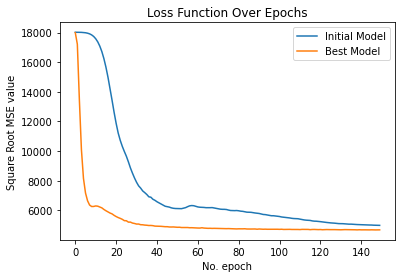

In [77]:

initial_model_root_mse = [math.sqrt(x) for x in history.history['mse']]
best_model_root_mse = [math.sqrt(x) for x in nn_history.history['mse']]

plt.plot(initial_model_root_mse, label='Initial Model')
plt.plot(best_model_root_mse, label='Best Model')
plt.title('Loss Function Over Epochs')
plt.ylabel('Square Root MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [78]:
results['better_nn_model'] = grid_search_nn.evaluate(x= X_train, y=y_train, verbose=0)

In [79]:
nn_results = {}
for key in results:
    if("nn_model" in key): nn_results[key] = results[key]

pd.DataFrame(nn_results, index=['MAE Loss', 'MSE']).T

,MAE Loss,MSE
basic_nn_model,1995.066650,23459852.0
better_nn_model,1585.901978,21520126.0


In [80]:
print("The Better NN MSE is: ", math.sqrt(nn_results['better_nn_model'][1]))

The Better NN MSE is:  4638.978982491729


In [154]:
predictions = grid_search_nn.predict(X_test)
for i, pred in enumerate(predictions):
    print("The actual is ", y_test.iloc[i], " and prediction is ", pred[0])

13/13 [==============================] - 0s 2ms/step
The actual is  1646.4297  and prediction is  1846.1117
The actual is  11353.2276  and prediction is  11318.795
The actual is  8798.593  and prediction is  8846.911
The actual is  10381.4787  and prediction is  10245.229
The actual is  2103.08  and prediction is  2082.7666
The actual is  38746.3551  and prediction is  37760.89
The actual is  9304.7019  and prediction is  9160.607
The actual is  11658.11505  and prediction is  11625.143
The actual is  3070.8087  and prediction is  3151.705
The actual is  19539.243  and prediction is  21395.352
The actual is  12629.8967  and prediction is  12833.586
The actual is  11538.421  and prediction is  11475.903
The actual is  6338.0756  and prediction is  6585.436
The actual is  7050.642  and prediction is  7008.931
The actual is  1137.4697  and prediction is  1186.3162
The actual is  8968.33  and prediction is  9006.002
The actual is  21984.47061  and prediction is  4165.6416
The actual is  64